# List of Environmental conditions to consider

For the SFT projects, consider the following environmental parameters for your analysis.

- Wind-sea (operation and ultimate state)
- Swell-sea (operation and ultimate state)
- Wave direction: Present the wave-direction rose diagram for wind-sea and swell-sea. <br> Consider only the dominant directions for your analysis. 
- Current speed and direction (operation and ultimate state)
- Tide (esp. if using pontoons) (operation and ultimate range)
- Seismic activity (if applicable)

# Extracting data from online dataset

We present the procedure for extracting the Hs and Tz for a location from online dataset.

## 1. Download data from onilne dataset

The following steps can be taken to extract environmental data at the location: 

1. Log in with user account on the site: <br>
https://cds.climate.copernicus.eu/user/login?destination=%2Fcdsapp%23!%2Fdataset%2Freanalysis-era5-single-levels%3Ftab%3Dform <br>
Use e-mail: makeYourEmailAccount<br>
Password: Password<br>
<img width="80%" src="./img/nb01_fig001.png" />

1. Choose **Reanalysis** and one or two variables of interest. <br>
In this case **Significant height of combined wind waves and swell**.  <br> It is noted that more detailed ocean waves data can be found under a separate tab. <br>
<img width="80%" src="./img/nb01_fig002.png" />

1. Choose one or several years. <br> 
For the statistical review it is important to have a number of years but the data which can be extracted is limited. <br> 
The choice here is to extract the years **2018**, **2019**, **2020** and **2021**. Next to this all year is chosen **January** etc. as well as all days.  <br>
<img width="80%" src="./img/nb01_fig003.png" /> 

1. For the time three hour values are chosen (to reduce the amount of data).  <br>
<img width="80%" src="./img/nb01_fig004.png" /> 

1. For Geographical area choose **Sub-region**. The longitude & latitude limits are given at the western and eastern side as well as Northern and Southern side. Data is extracted in the area between the values. <br>
<img width="80%" src="./img/nb01_fig005.png" /> 

1. On the format choose **NetCFD** <br>
<img width="80%" src="./img/nb01_fig006.png" /> 

1. If all has been filled in correctly data can be extracted. **Submit Form** <br>
<img width="80%" src="./img/nb01_fig007.png" /> 

1. The request is now shown in a new page and by expanding the product details are shown. This request took around 8 min to deliver. <br>
<img width="80%" src="./img/nb01_fig008.png" /> 

1. The data can be downloaded. Once this is done the Python script can be used to extract the data.  <br>
<img width="80%" src="./img/nb01_fig009.png" /> 


## 2. Extract data from dataset

This is achieved using **netCDF4** package

In [53]:
from netCDF4 import Dataset
#nc = Dataset('Hs_Irish_sea_Data.nc', 'r')
nc = Dataset('data/Swell_only_2017.nc', 'r')
print(nc.variables)
pass

{'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (2920,)
filling on, default _FillValue of -2147483647 used, 'mp2': <class 'netCDF4._netCDF4.Variable'>
int16 mp2(time, latitude, longitude)
    scale_factor: 0.00010822287643870592
    add_offset: 6.078637847942884
    _FillValue: -32767
    missing_value: -32767
    units: s
    long_name: Mean zero-crossing wave period
unlimited dimensions: 
c

In [54]:
lon = nc.variables['longitude']
lat = nc.variables['latitude']
time = nc.variables['time']

for d in nc.dimensions.items():
    print(d)

('longitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 2)
('latitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 2)
('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 2920)


#### The dataset contains values at 2 locations for 17536 time-instances

In [55]:
lon_array = lon[:]
lat_array = lat[:]
Time_array = time[:]

print(lon_array)

print(lat_array)

print(Time_array)
pass

[6.  6.5]
[62.5 62. ]
[1025616 1025619 1025622 ... 1034367 1034370 1034373]


#### Extracting significant wave-height (hs) and zero-crossing up-crossing time-period (tz)

In [56]:
hs = nc.variables['shts']
tz = nc.variables['mp2']

hs_array = hs[:]
period_array = tz[:]

#print("Hs array")
#print(hs_array)

#print("Tz array")
#print(period_array)

In [57]:
i = 0 #for the present case, the values can be 0,1
j = 0 #for the present case, the values can be 0,1
hs_array = hs[:,i,j]
period_array = tz[:,i,j]

print("Hs array")
print(hs_array)

print("Tz array")
print(period_array)

Hs array
[2.14659279 2.18805253 1.86027552 ... 1.01392666 1.00937559 1.08469329]
Tz array
[6.92266806 6.97006968 6.42018925 ... 6.14541136 5.39456105 5.71782278]


#### Exporting to excel sheet

In [58]:
import xlsxwriter

workbook = xlsxwriter.Workbook('data/Swell_2017.xlsx')

worksheet = workbook.add_worksheet()

array = [Time_array,
         hs_array,
         period_array]

row = 0

for col, data in enumerate(array):
    worksheet.write_column(row, col, data)

workbook.close()

## 3. Visualisation of the data

Text(0.5, 1.0, 'Waveheight - Period: Wind waves only')

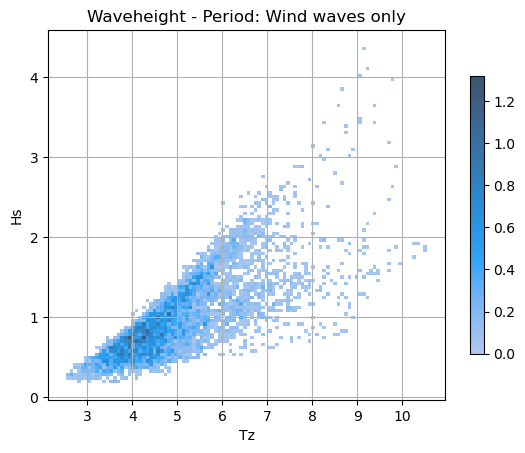

In [59]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataIn = pd.read_excel('data/Swell_def.xlsx')

sns.histplot(data=dataIn, x = 'Tz', y = 'Hs', bins=100, cbar=True, cbar_kws=dict(shrink=.75), stat='density');
plt.grid()
plt.title('Waveheight - Period: Wind waves only')

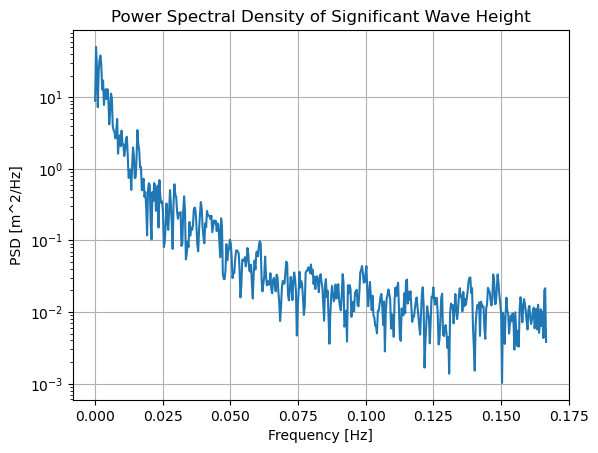

In [61]:

from scipy.signal import welch

# Assuming fs is the sampling frequency (in Hz) of your data
fs = 1.0 / (Time_array[1] - Time_array[0])  # Calculate sampling frequency

# Compute PSD using Welch method
frequencies, psd = welch(hs_array, fs=fs, nperseg=1024)

# Plot PSD
plt.figure()
plt.semilogy(frequencies, psd)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [m^2/Hz]')
plt.title('Power Spectral Density of Significant Wave Height')
plt.grid(True)
plt.show()

